### SPEECH TRANSLATION


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This Project includes implementation of Encoder-Decoder model and implementation of RNN

**Encoder-Decoder (encoding-decoding) is a very common model framework in deep learning. For example, auto-encoding of unsupervised algorithms is designed and trained with the structure of encoding-decoding; Is the encoding-decoding framework of CNN-RNN; for example, the neural network machine translation NMT model is often the LSTM-LSTM encoding-decoding framework.**

Therefore, to be precise, Encoder-Decoder is not a specific model, but a kind of framework. Encoder and Decoder parts can be any text, voice, image, video data, and models can use CNN, RNN, BiRNN, LSTM, GRU, etc. So based on Encoder-Decoder, we can design a variety of application algorithms.

Here we have made use of **voice**

One of the most significant features of the Encoder-Decoder framework is that it is an End-to-End learning algorithm. Such models are often used in machine translation, such as translating one language to another . Such a model is also called Sequence to Sequence learning. The so-called encoding is to convert the input sequence into a fixed-length vector and decoding is to convert the previously generated fixed vector into an output sequence.

### Python libraries used for this project -
    - librosa            - for audio processing
    - os                 - for operating system files
    - numpy              - for numerical analysis
    - matplotlib         - for data visualization
    - scipy              - for wavfile handling
    - speech_recognition - for translating speech to text
    - pydub              - working with wav files
    - tensorflow         - machine learning library
    - keras              - neural network library(runs on top of tensorflow)

In [3]:
!pip install gtts

In [4]:
import os
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import warnings
warnings.filterwarnings("ignore")
from __future__ import print_function
from gtts import gTTS

from keras.models import Model
from keras.layers import Input, LSTM, Dense

**Data Exploration and Visualization**

Data Exploration and Visualization helps us to understand the data as well as pre-processing steps in a better way.

**Visualization of Audio signal in time series domain**

Now, we’ll visualize the audio signal in the time series domain:

In [6]:
train_audio_path = '/content/drive/MyDrive/Colab_Notebooks/OSR_UK.wav'
#train_audio_path = './OSR_boy.wav'
samples, sample_rate = librosa.load(train_audio_path)
print(f"Samples for the loaded data is:{samples}\n")
print(f"Sample rate for the loaded data is:{sample_rate}")

Samples for the loaded data is:[0.00689434 0.00987685 0.01056969 ... 0.01828913 0.01285192 0.00607796]

Sample rate for the loaded data is:22050


In [7]:
ipd.Audio(samples, rate=sample_rate)

### SPECTOGRAM

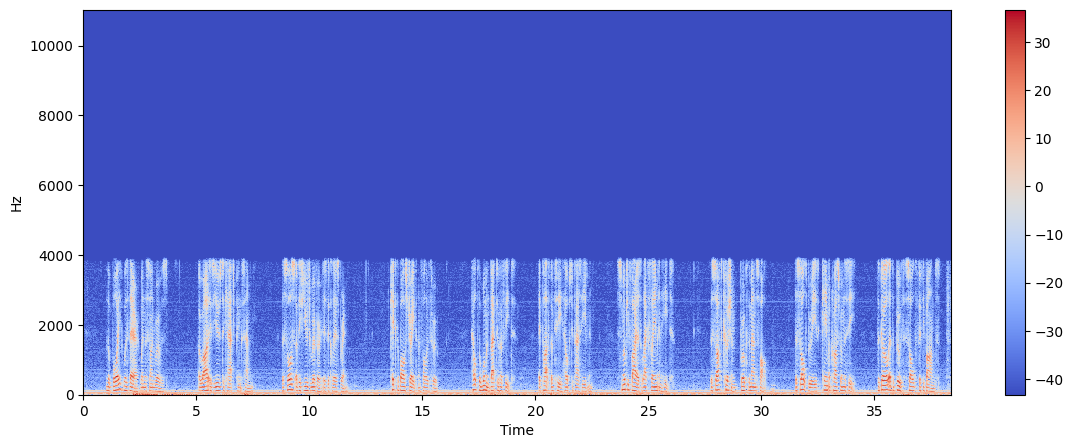

In [8]:
import librosa.display
X = librosa.stft(samples)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

### The vertical axis shows frequencies (from 0 to 10kHz), and the horizontal axis shows the time of the clip.

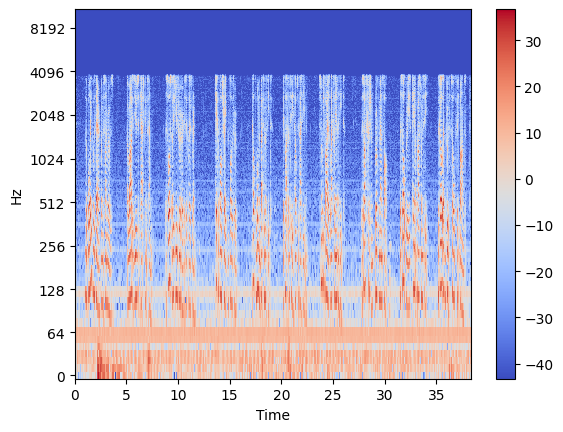

In [9]:
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar()

## Feature-Extraction - Zero-Crossing Rate

In [12]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

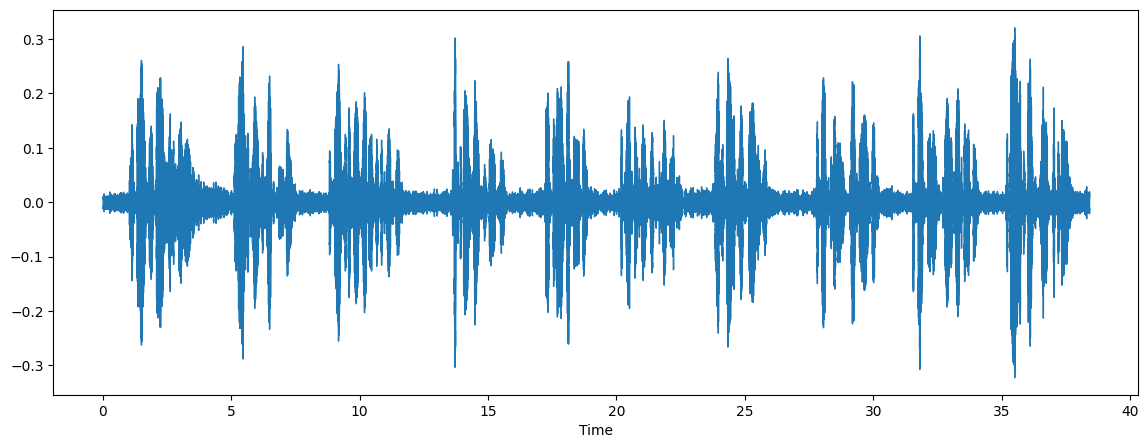

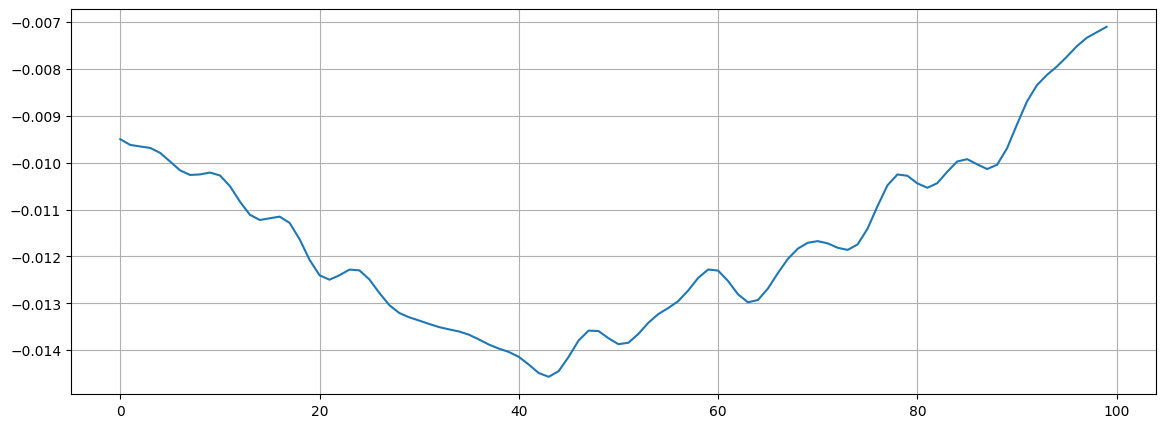

In [14]:
train_audio_path = '/content/drive/MyDrive/Colab_Notebooks/OSR_UK.wav'
x, sr = librosa.load(train_audio_path,sr=sample_rate)

#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [15]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print("Total Zero crossings:",sum(zero_crossings))

Total Zero crossings: 0


### Mel-Frequency Cepstral Coefficients(MFCCs)

(20, 601)


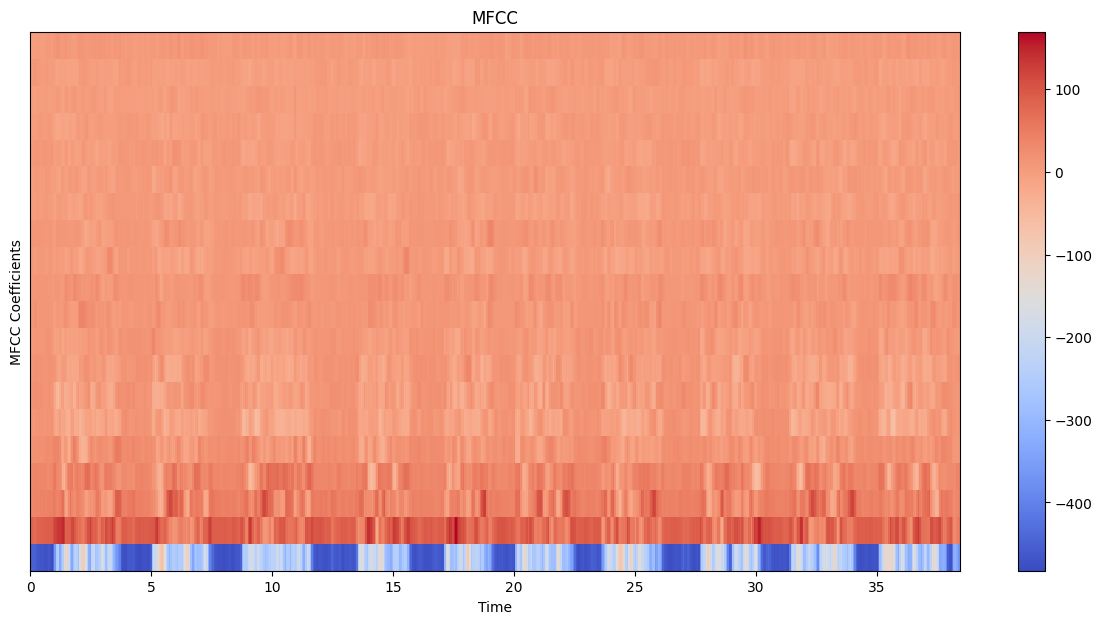

In [17]:
# mfccs = librosa.feature.mfcc(x, sr=sr)
# print(mfccs.shape)
# (20, 97)
# #Displaying  the MFCCs:
# plt.figure(figsize=(15, 7))
# librosa.display.specshow(mfccs, sr=sr, x_axis='time')
# Load the audio file
train_audio_path = '/content/drive/MyDrive/Colab_Notebooks/OSR_UK.wav'
x, sr = librosa.load(train_audio_path, sr=None)

# Extract MFCC features
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)

# Displaying the MFCCs
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.show()

In [19]:
# # load wave file
# wav, _ = librosa.load(train_audio_path, mono=True, sr=16000)
# # get mfcc feature
# mfcc = np.transpose(np.expand_dims(librosa.feature.mfcc(wav, 16000), axis=0), [0, 2, 1])
# Load wave file
train_audio_path = '/content/drive/MyDrive/Colab_Notebooks/OSR_UK.wav'
wav, _ = librosa.load(train_audio_path, mono=True, sr=16000)

# Get MFCC feature
mfcc = librosa.feature.mfcc(y=wav, sr=16000)

# Expand dimensions and transpose if needed
mfcc = np.expand_dims(mfcc, axis=0)  # Expand dimensions
mfcc = np.transpose(mfcc, [0, 2, 1])  # Transpose to the desired shape

print(mfcc.shape)

(1, 1201, 20)


In [20]:
print(f"MFCC : {mfcc}")

MFCC : [[[-4.85370087e+02  1.11797348e+02  1.87908211e+01 ...  2.39051795e+00
    2.80081987e+00  5.56546211e+00]
  [-4.92226501e+02  1.06358139e+02  2.12374954e+01 ...  3.14413118e+00
    2.46088552e+00  6.68143177e+00]
  [-4.98469971e+02  1.01698006e+02  1.90406837e+01 ... -7.79692531e-01
   -3.21503699e-01  9.48252869e+00]
  ...
  [-4.16826508e+02  1.10942444e+02 -2.45988960e+01 ...  5.98271275e+00
   -3.14752579e+00  8.77888393e+00]
  [-4.10370209e+02  1.11495346e+02 -2.70998764e+01 ...  7.10912132e+00
   -1.93972021e-01  7.97107697e+00]
  [-4.23306763e+02  1.17700531e+02 -1.75024033e+01 ...  4.81408691e+00
    2.36800504e+00  4.47771454e+00]]]


### Step of Conversion of Speech to text

In [22]:
!pip install pydub

In [25]:
!pip install speechrecognition pydub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 24.5 MB/s eta 0:00:00


In [26]:
!apt-get install ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [28]:
from pydub import AudioSegment
import speech_recognition as sr

'''Input audio file to be sliced'''

audio = AudioSegment.from_wav("/content/drive/MyDrive/Colab_Notebooks/OSR_UK.wav")
#audio = AudioSegment.from_wav("./OSR_boy.wav")

'''
Step #1 - Now we will be slicing the audio file into chunks of smaller parts
'''
# Length of the audiofile in milliseconds
n = len(audio)

print(f"Length of audio :{n}")

'''Variable to count the number of sliced chunks'''

counter = 1

'''Text file to write the recognized audio'''

fh = open("recognized.txt", "w+")

'''
Interval length at which to slice the audio file.
# If length is 22 seconds, and interval is 5 seconds,
# The chunks created will be:
# chunk1 : 0 - 5 seconds
# chunk2 : 5 - 10 seconds
# chunk3 : 10 - 15 seconds
# chunk4 : 15 - 20 seconds
# chunk5 : 20 - 22 seconds '''

interval = 5 * 1000
overlap = 1.5 * 1000

'''Initialize start and end seconds to 0'''
start = 0
end = 0

'''
Flag to keep track of end of file.
When audio reaches its end, flag is set to 1 and we break the loop
'''
flag = 0

'''Iterating'''

for i in range(0, 2 * n, interval):
    if i == 0:
        start = 0
        end = interval
    else:
        start = end - overlap
        end = start + interval
    if end >= n:
        end = n
        flag = 1
    chunk = audio[start:end]
    filename = 'chunk'+str(counter)+'.wav'
    chunk.export(filename, format ="wav")
    print("Processing chunk "+str(counter)+". Start = " +str(start)+" end = "+str(end))
    counter = counter + 1
    AUDIO_FILE = filename

    '''Initialize the recognizer'''
    r = sr.Recognizer()
    with sr.AudioFile(AUDIO_FILE) as source:
        audio_listened = r.listen(source)
    try:
        rec = r.recognize_google(audio_listened)
        fh.write(rec+" ")
    except sr.UnknownValueError:
        print("Could not understand audio")
    except sr.RequestError as e:
        print("Could not request results.")
    if flag == 1:
        fh.close()
        break

Length of audio :38400
Processing chunk 1. Start = 0 end = 5000
Processing chunk 2. Start = 3500.0 end = 8500.0
Processing chunk 3. Start = 7000.0 end = 12000.0
Processing chunk 4. Start = 10500.0 end = 15500.0
Processing chunk 5. Start = 14000.0 end = 19000.0
Processing chunk 6. Start = 17500.0 end = 22500.0
Processing chunk 7. Start = 21000.0 end = 26000.0
Processing chunk 8. Start = 24500.0 end = 29500.0
Processing chunk 9. Start = 28000.0 end = 33000.0
Processing chunk 10. Start = 31500.0 end = 36500.0
Processing chunk 11. Start = 35000.0 end = 38400


In [29]:
def read_data():
    with open('./recognized.txt', 'r') as file:
        data = file.read()
        print(f" Data after conversion from speech to text is : \n {data}")
read_data()

 Data after conversion from speech to text is : 
 the boy was there when the sun rose is a rod is used to catch pink salmon play some the source of the huge river is the Clear Spring where is the Clear Spring fall straight and follow through help the woman back to her feet the woman back to her feet a pot of tea helps to pass the he helps to pass the evening Smoky fires lack flame and does black flame in heat soft cushion broke the man's fall the salt Breeze the salt Breeze came across from the sea the girl at the booth the girl at the booth sold 50 bonds 


### SEQUENCE 2 SEQUENCE MODEL

In [32]:
batch_s = 64  # Batch size for training.
epochs = 200  # Number of epochs to train for.
latent_dimension = 256  # Latent dimensionality of the encoding space.
number_samples = 12  # Number of samples to train on.
# Path to the data txt file on disk.
data_path = '/content/drive/MyDrive/Colab_Notebooks/OSR.txt'

In [33]:
# Vectorize the data.
input_texts = []
target_texts = []
input_characters = set()
target_characters = set()
with open(data_path, 'r', encoding='utf-8') as f:
    lines = f.read().split('\n')
for line in lines[: min(number_samples, len(lines) - 1)]:
    input_text, target_text, _ = line.split('\t')
    # We use "tab" as the "start sequence" character
    # for the targets, and "\n" as "end sequence" character.
    target_text = '\t' + target_text + '\n'
    input_texts.append(input_text)
    target_texts.append(target_text)
    for char in input_text:
        if char not in input_characters:
            input_characters.add(char)
    for char in target_text:
        if char not in target_characters:
            target_characters.add(char)

input_characters = sorted(list(input_characters))
target_characters = sorted(list(target_characters))
num_encoder_tokens = len(input_characters)
num_decoder_tokens = len(target_characters)
max_encoder_seq_length = max([len(txt) for txt in input_texts])
max_decoder_seq_length = max([len(txt) for txt in target_texts])

In [34]:
print('Number of samples:', len(input_texts))
print('Number of unique input tokens:', num_encoder_tokens)
print('Number of unique output tokens:', num_decoder_tokens)
print('Max sequence length for inputs:', max_encoder_seq_length)
print('Max sequence length for outputs:', max_decoder_seq_length)

Number of samples: 11
Number of unique input tokens: 31
Number of unique output tokens: 51
Max sequence length for inputs: 49
Max sequence length for outputs: 68


In [35]:
input_token_index = dict(
    [(char, i) for i, char in enumerate(input_characters)])
target_token_index = dict(
    [(char, i) for i, char in enumerate(target_characters)])

In [36]:
encoder_input_data = np.zeros(
    (len(input_texts), max_encoder_seq_length, num_encoder_tokens),
    dtype='float32')
decoder_input_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')
decoder_target_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')

In [37]:
for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
    for t, char in enumerate(input_text):
        encoder_input_data[i, t, input_token_index[char]] = 1.
    encoder_input_data[i, t + 1:, input_token_index[' ']] = 1.
    for t, char in enumerate(target_text):
        # decoder_target_data is ahead of decoder_input_data by one timestep
        decoder_input_data[i, t, target_token_index[char]] = 1.
        if t > 0:
            # decoder_target_data will be ahead by one timestep
            # and will not include the start character.
            decoder_target_data[i, t - 1, target_token_index[char]] = 1.
    decoder_input_data[i, t + 1:, target_token_index['\t']] = 1.
    decoder_target_data[i, t:, target_token_index['\t']] = 1.

In [38]:
# Define an input sequence and process it.
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder = LSTM(latent_dimension, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

In [39]:
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None, num_decoder_tokens))
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dimension, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [40]:
# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [41]:
# Run training
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
          batch_size=batch_s,
          epochs=epochs,
          validation_split=0.40)

Epoch 1/200
1/1 [==============================] - 7s 7s/step - loss: 3.9395 - accuracy: 0.0098 - val_loss: 3.7699 - val_accuracy: 0.4265
Epoch 2/200
1/1 [==============================] - 0s 288ms/step - loss: 3.7940 - accuracy: 0.3578 - val_loss: 3.5282 - val_accuracy: 0.4118
Epoch 3/200
1/1 [==============================] - 0s 219ms/step - loss: 3.5892 - accuracy: 0.3431 - val_loss: 2.5994 - val_accuracy: 0.4147
Epoch 4/200
1/1 [==============================] - 0s 256ms/step - loss: 2.8793 - accuracy: 0.3431 - val_loss: 2.4429 - val_accuracy: 0.4176
Epoch 5/200
1/1 [==============================] - 0s 247ms/step - loss: 2.7655 - accuracy: 0.3456 - val_loss: 3.4477 - val_accuracy: 0.4853
Epoch 6/200
1/1 [==============================] - 0s 250ms/step - loss: 3.5145 - accuracy: 0.4142 - val_loss: 2.9881 - val_accuracy: 0.5029
Epoch 7/200
1/1 [==============================] - 0s 213ms/step - loss: 3.1130 - accuracy: 0.4387 - val_loss: 2.4872 - val_accuracy: 0.4529
Epoch 8/200
1/1 

In [42]:
# Next: inference mode (sampling).
# Here's the drill:
# 1) encode input and retrieve initial decoder state
# 2) run one step of decoder with this initial state
# and a "start of sequence" token as target.
# Output will be the next target token
# 3) Repeat with the current target token and current states

# Define sampling models
encoder_model = Model(encoder_inputs, encoder_states)

decoder_state_input_h = Input(shape=(latent_dimension,))
decoder_state_input_c = Input(shape=(latent_dimension,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

In [43]:
# Reverse-lookup token index to decode sequences back to
# something readable.
reverse_input_char_index = dict(
    (i, char) for char, i in input_token_index.items())
reverse_target_char_index = dict(
    (i, char) for char, i in target_token_index.items())

In [44]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, target_token_index['\t']] = 1.

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '\n' or
           len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.

        # Update states
        states_value = [h, c]

    return decoded_sentence

In [45]:
for seq_index in range(11):
    # Take one sequence (part of the training set)
    # for trying out decoding.
    input_seq = encoder_input_data[seq_index: seq_index + 1]
    try:
        decoded_sentence = decode_sequence(input_seq)
    except:
        print(f"Data cannot be inserted")
    print('-')
    print('Input sentence:', input_texts[seq_index])
    print('Decoded sentence:', decoded_sentence)

1/1 [==============================] - 0s 23ms/step
-
Input sentence: The boy was there when the sun rose.
Decoded sentence: गिाा   स  ा  रर र र र वसससससससेसें सेंं ें ेे े ेे े े े के े े े े े
1/1 [==============================] - 0s 22ms/step
-
Input sentence: A rod is used to catch pink salmon.
Decoded sentence: गिाा   स  ा  रर र र र वसससससससेसें सेंं ें ेे े ेे े े े के े े े े े
1/1 [==============================] - 0s 29ms/step
-
Input sentence: The source of the huge river is the clear spring.
Decoded sentence: गिाा   स  ा  रर र र र वसससससससेसें सेंं ें ेे े ेे े े े के े े े े े
1/1 [==============================] - 0s 22ms/step
-
Input sentence: Kick the ball straight and follow through.
Decoded sentence: गिाा   स  ा  रर र र र वसससससससेसें सेंं ें ेे े ेे े े े के े े े े े
1/1 [==============================] - 0s 22ms/step
-
Input sentence: Kick the ball straight and follow through.
Decoded sentence: गिाा   स  ा  रर र र र वसससससससेसें सेंं ें ेे े ेे े े े के े े े े े
1

### SPEECH GENERATION

In [46]:
# The text that you want to convert to audio
mytext = 'सूरज उगने पर लड़का वहीं था। गुलाबी सामन को पकड़ने के लिए एक छड़ का उपयोग किया जाता है। विशाल नदी का स्रोत स्पष्ट वसंत है।'

# Language in which you want to convert
language = 'hi'

# Passing the text and language to the engine,
# here we have marked slow=False. Which tells
# the module that the converted audio should
# have a high speed
obj = gTTS(text=mytext, lang=language, slow=False)

# Saving the converted audio in a mp3 file named
# eng-hin.mp3
obj.save("eng-hin.wav")

# Playing the converted file
txt2spch = './eng-hin.wav'
ipd.Audio(txt2spch)